In [15]:
#lectura de archivo
data <- read.csv(file="DatosInforme19.csv",head=TRUE,sep=";")
#Muestra la data
#data
# Resumen estadistico
summary(data)

 Sexo    Horas.Estudio.Semanal      VTR            Tiempo.Libre      Carrete   
 F:501   <2 hr  :266           Min.   :0.0000   Demasiado: 89   Demasiado:137  
 M:369   >10 hr : 59           1st Qu.:0.0000   Mucho    :237   Mucho    :188  
         2-5 hr :409           Median :0.0000   Nada     : 61   Nada     : 62  
         5-10 hr:136           Mean   :0.2057   Normal   :330   Normal   :272  
                               3rd Qu.:0.0000   Poco     :153   Poco     :211  
                               Max.   :2.0000                                  
        Salud     Inasistencias    Nota.Final
 Buena     :148   Min.   : 0.000   <55 :325  
 Muy Buena :306   1st Qu.: 2.000   >=55:545  
 Muy Mala  :121   Median : 3.000             
 Normal    :190   Mean   : 3.863             
 Suficiente:105   3rd Qu.: 6.000             
                  Max.   :10.000             

[1] 724   8

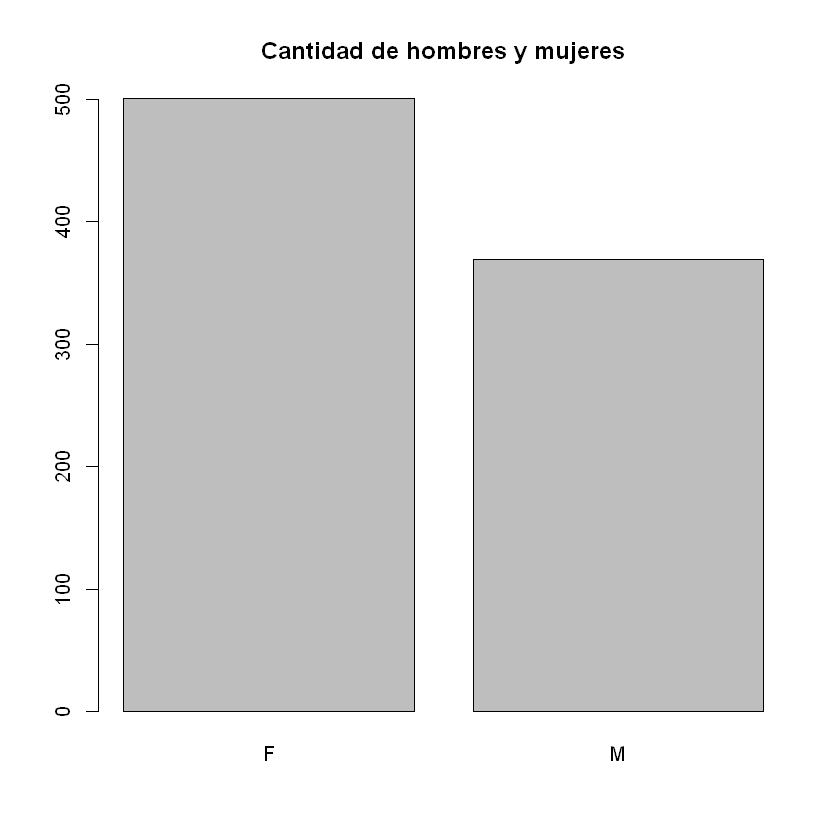

In [27]:
#Grafico de barras
barplot(table(data$Sexo),main="Cantidad de hombres y mujeres")
#Encontar cantidad de 0 en vtr
vtr0 <- subset(data, VTR == 0, )  #crea un data fram solo con los valores 0
dim(vtr0) #Dimenciones de data frame

               

In [135]:
print("Forma conpacta de la data antes de discretizar")
str(data)
#Discretizar variables
data$Inasistencias = as.factor(data$Inasistencias)
data$VTR = as.factor(data$VTR)
print("Forma conpacta de la data despues de discretizar")
str(data)

[1] "Forma conpacta de la data antes de discretizar"
'data.frame':	870 obs. of  8 variables:
 $ Sexo                 : Factor w/ 2 levels "F","M": 1 1 1 1 2 2 1 2 2 1 ...
 $ Horas.Estudio.Semanal: Factor w/ 4 levels "<2 hr",">10 hr",..: 3 3 4 3 3 3 3 3 3 3 ...
 $ VTR                  : Factor w/ 3 levels "0","1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ Tiempo.Libre         : Factor w/ 5 levels "Demasiado","Mucho",..: 4 4 5 4 2 2 3 5 1 4 ...
 $ Carrete              : Factor w/ 5 levels "Demasiado","Mucho",..: 2 4 5 5 5 2 2 5 3 4 ...
 $ Salud                : Factor w/ 5 levels "Buena","Muy Buena",..: 4 4 2 2 2 4 3 3 2 5 ...
 $ Inasistencias        : Factor w/ 11 levels "0","1","2","3",..: 7 5 3 5 3 5 7 2 4 1 ...
 $ Nota.Final           : Factor w/ 2 levels "<55",">=55": 1 1 2 1 2 2 1 2 2 1 ...
[1] "Forma conpacta de la data despues de discretizar"
'data.frame':	870 obs. of  8 variables:
 $ Sexo                 : Factor w/ 2 levels "F","M": 1 1 1 1 2 2 1 2 2 1 ...
 $ Horas.Estudio.Semanal: Factor

In [184]:
# Creacion Conjuntos para usar en el árbol de clasificacíon
#Librerias
library(tidyverse)
# Creacion data entrenamiento
set.seed(7)
data_train <- sample_frac(data, .7) #Al 80%
# Creacion data test
data_test <- setdiff(data, data_train)
#Muestra la cantidad de registros en cada conjunto de datos
print("Dimensiones data completa")
dim(data)
print("Dimensiones data train")
dim(data_train)
print("Dimensiones data test")
dim(data_test)

[1] "Dimensiones data completa"


[1] 870   8

[1] "Dimensiones data train"


[1] 609   8

[1] "Dimensiones data test"


[1] 261   8

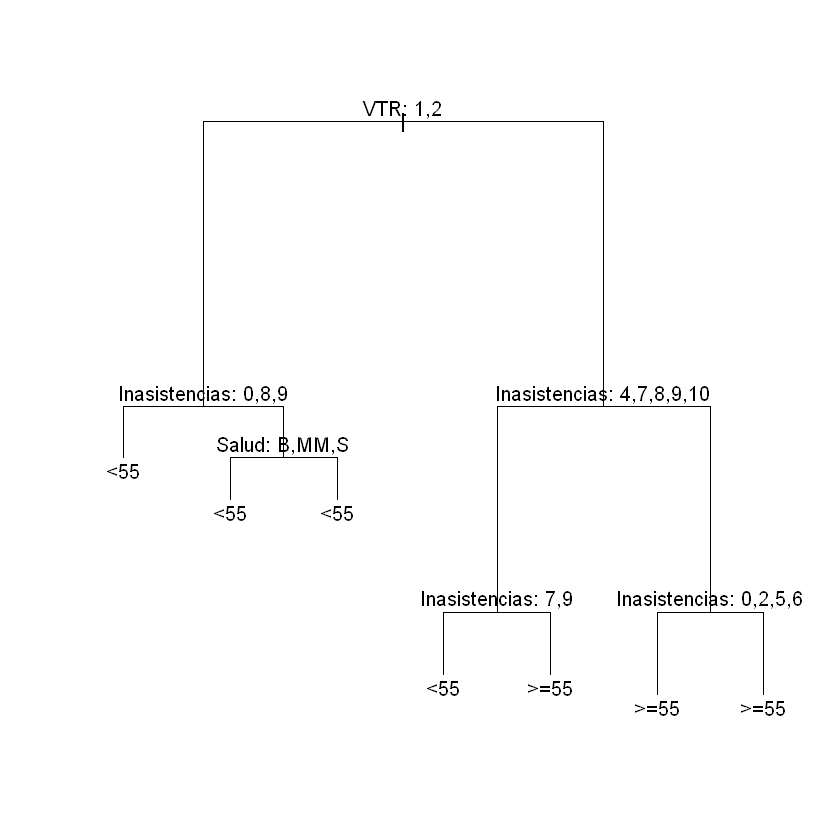

In [185]:
#import libreria
library(tree)
#Arbol creado usando libreria tree
mytree <- tree(
  Nota.Final ~ Sexo + Horas.Estudio.Semanal + VTR + Tiempo.Libre + Carrete + Salud + Inasistencias, 
  data = data_train, 
  method = "class", 
)
#Mostrar plot del arbol creado
plot(mytree)
text(mytree, pretty = 1)


In [186]:
#Import libreria
library(rpart)
library(rattle)
library(rpart.plot)
library(RColorBrewer)
#Arbol creado usando libreria rpart
mytree2 <- rpart(
  Nota.Final ~., 
  data = data_train, 
  method = "class", 
)

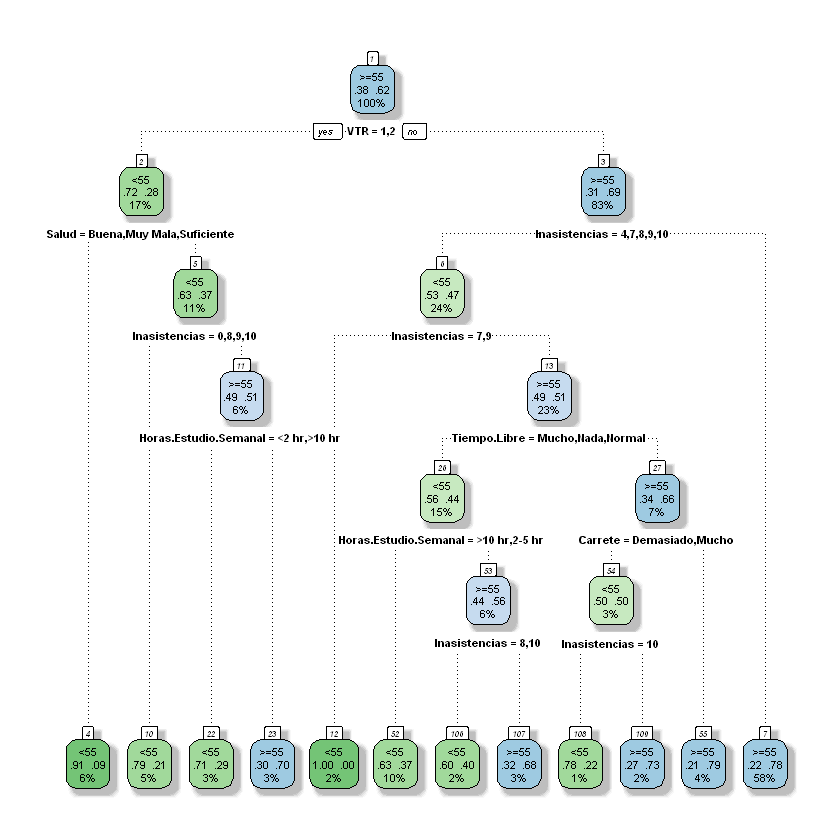

In [187]:
# plot mytree2
fancyRpartPlot(mytree2, caption = NULL)

In [188]:
#Calculo precision de modelos.
#Arbol con Rpart
library(caret)
prediccion_1 <- predict(mytree2, newdata = data_test, type = "class")
confusionMatrix(prediccion_1, data_test[["Nota.Final"]])
#Arbol con Tree
prediccion_2 <- predict(mytree, newdata = data_test, type = "class")
confusionMatrix(prediccion_2, data_test[["Nota.Final"]])

Confusion Matrix and Statistics

          Reference
Prediction <55 >=55
      <55   46   26
      >=55  47  142
                                          
               Accuracy : 0.7203          
                 95% CI : (0.6616, 0.7739)
    No Information Rate : 0.6437          
    P-Value [Acc > NIR] : 0.005236        
                                          
                  Kappa : 0.3579          
                                          
 Mcnemar's Test P-Value : 0.019241        
                                          
            Sensitivity : 0.4946          
            Specificity : 0.8452          
         Pos Pred Value : 0.6389          
         Neg Pred Value : 0.7513          
             Prevalence : 0.3563          
         Detection Rate : 0.1762          
   Detection Prevalence : 0.2759          
      Balanced Accuracy : 0.6699          
                                          
       'Positive' Class : <55             
                           

Confusion Matrix and Statistics

          Reference
Prediction <55 >=55
      <55   35   11
      >=55  58  157
                                          
               Accuracy : 0.7356          
                 95% CI : (0.6777, 0.7881)
    No Information Rate : 0.6437          
    P-Value [Acc > NIR] : 0.000967        
                                          
                  Kappa : 0.3504          
                                          
 Mcnemar's Test P-Value : 3.064e-08       
                                          
            Sensitivity : 0.3763          
            Specificity : 0.9345          
         Pos Pred Value : 0.7609          
         Neg Pred Value : 0.7302          
             Prevalence : 0.3563          
         Detection Rate : 0.1341          
   Detection Prevalence : 0.1762          
      Balanced Accuracy : 0.6554          
                                          
       'Positive' Class : <55             
                           

In [189]:
prediccion_6 <- predict(mytree2, newdata = data_train, type = "class")
confusionMatrix(prediccion_6, data_train[["Nota.Final"]])

Confusion Matrix and Statistics

          Reference
Prediction <55 >=55
      <55  134   45
      >=55  98  332
                                          
               Accuracy : 0.7652          
                 95% CI : (0.7295, 0.7983)
    No Information Rate : 0.619           
    P-Value [Acc > NIR] : 1.085e-14       
                                          
                  Kappa : 0.4793          
                                          
 Mcnemar's Test P-Value : 1.371e-05       
                                          
            Sensitivity : 0.5776          
            Specificity : 0.8806          
         Pos Pred Value : 0.7486          
         Neg Pred Value : 0.7721          
             Prevalence : 0.3810          
         Detection Rate : 0.2200          
   Detection Prevalence : 0.2939          
      Balanced Accuracy : 0.7291          
                                          
       'Positive' Class : <55             
                           

In [162]:
#Arbol creado usando libreria rpart
mytree3 <- rpart(
  Nota.Final ~Sexo + Horas.Estudio.Semanal + Tiempo.Libre + Carrete + Salud + Inasistencias, 
  data = data_train, 
  method = "class", 
)
mytree3 

n= 696 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 696 257 >=55 (0.3692529 0.6307471)  
   2) Inasistencias=7,8,9,10 127  42 <55 (0.6692913 0.3307087)  
     4) Tiempo.Libre=Demasiado,Mucho,Nada,Normal 101  28 <55 (0.7227723 0.2772277) *
     5) Tiempo.Libre=Poco 26  12 >=55 (0.4615385 0.5384615)  
      10) Carrete=Mucho,Nada 12   3 <55 (0.7500000 0.2500000) *
      11) Carrete=Normal,Poco 14   3 >=55 (0.2142857 0.7857143) *
   3) Inasistencias=0,1,2,3,4,5,6 569 172 >=55 (0.3022847 0.6977153) *

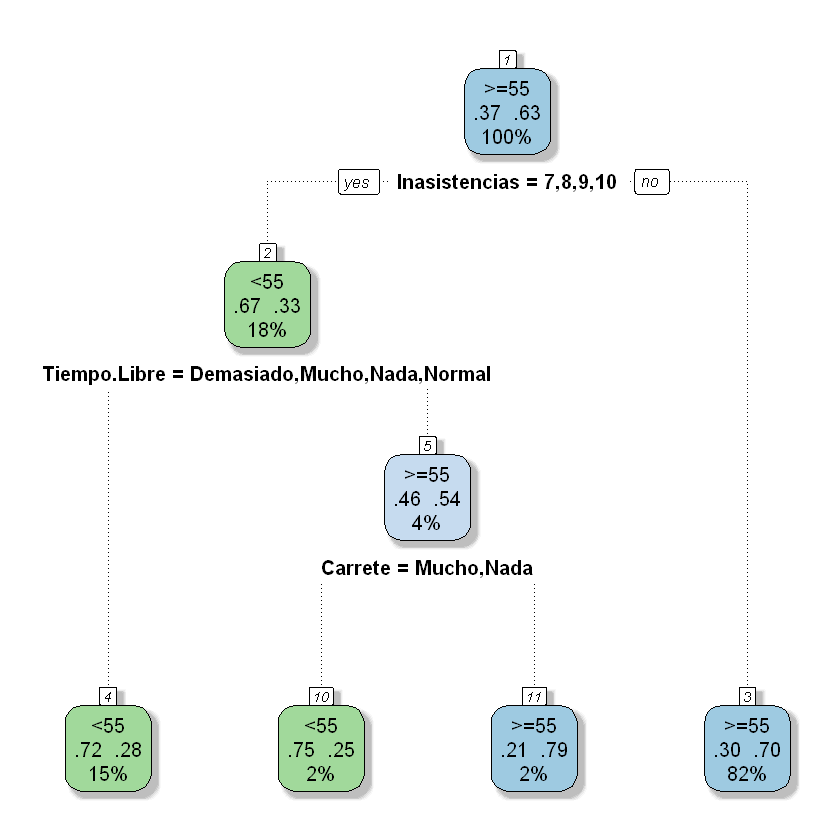

In [164]:
# plot mytree2
fancyRpartPlot(mytree3, caption = NULL)

In [165]:
#Calculo precision de modelos.
#Arbol con Rpart 2
prediccion_3 <- predict(mytree3, newdata = data_test, type = "class")
confusionMatrix(prediccion_3, data_test[["Nota.Final"]])

Confusion Matrix and Statistics

          Reference
Prediction <55 >=55
      <55   26    9
      >=55  42   97
                                          
               Accuracy : 0.7069          
                 95% CI : (0.6333, 0.7733)
    No Information Rate : 0.6092          
    P-Value [Acc > NIR] : 0.004606        
                                          
                  Kappa : 0.3258          
                                          
 Mcnemar's Test P-Value : 7.433e-06       
                                          
            Sensitivity : 0.3824          
            Specificity : 0.9151          
         Pos Pred Value : 0.7429          
         Neg Pred Value : 0.6978          
             Prevalence : 0.3908          
         Detection Rate : 0.1494          
   Detection Prevalence : 0.2011          
      Balanced Accuracy : 0.6487          
                                          
       'Positive' Class : <55             
                           

n= 696 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 696 257 >=55 (0.3692529 0.6307471)  
  2) VTR=1,2 115  30 <55 (0.7391304 0.2608696) *
  3) VTR=0 581 172 >=55 (0.2960413 0.7039587) *

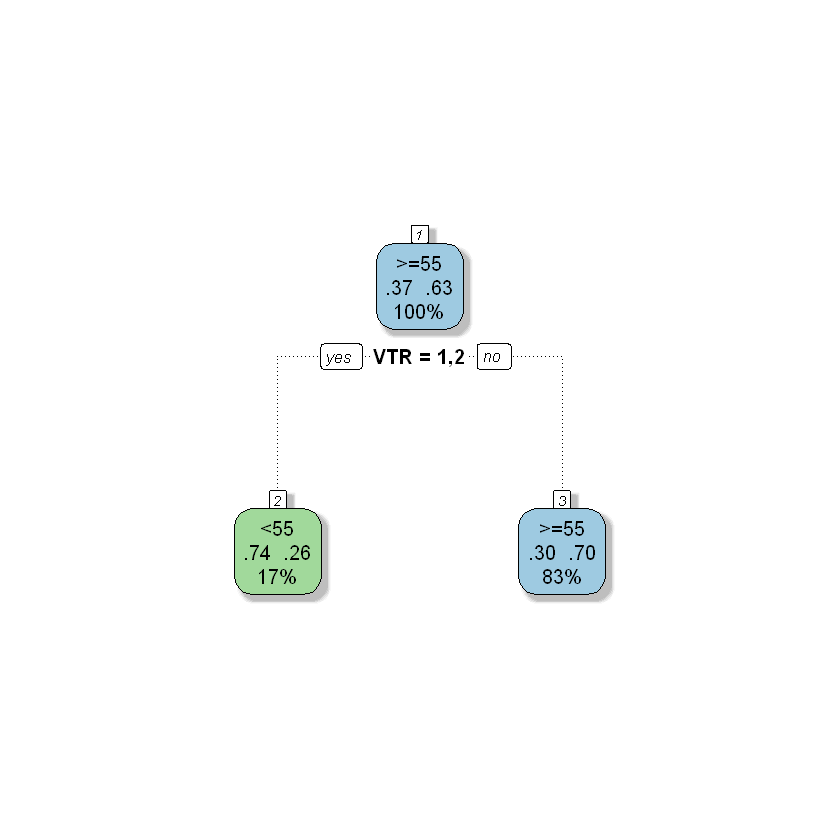

In [168]:
#Arbol creado usando libreria rpart
mytree4 <- rpart(
  Nota.Final ~Sexo + Horas.Estudio.Semanal +VTR+ Tiempo.Libre + Carrete + Salud, 
  data = data_train, 
  method = "class", 
)
mytree4 
# plot mytree2
fancyRpartPlot(mytree4, caption = NULL)

In [170]:
#Calculo precision de modelos.
#Arbol con Rpart 2
prediccion_4 <- predict(mytree4, newdata = data_test, type = "class")
confusionMatrix(prediccion_4, data_test[["Nota.Final"]])

Confusion Matrix and Statistics

          Reference
Prediction <55 >=55
      <55   23    8
      >=55  45   98
                                          
               Accuracy : 0.6954          
                 95% CI : (0.6212, 0.7628)
    No Information Rate : 0.6092          
    P-Value [Acc > NIR] : 0.01126         
                                          
                  Kappa : 0.2912          
                                          
 Mcnemar's Test P-Value : 7.615e-07       
                                          
            Sensitivity : 0.3382          
            Specificity : 0.9245          
         Pos Pred Value : 0.7419          
         Neg Pred Value : 0.6853          
             Prevalence : 0.3908          
         Detection Rate : 0.1322          
   Detection Prevalence : 0.1782          
      Balanced Accuracy : 0.6314          
                                          
       'Positive' Class : <55             
                           